In [2]:
from transformers import RobertaTokenizer, TFRobertaModel
import tensorflow as tf

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import os, sys, json

%matplotlib inline

In [3]:
DATA_DIR = os.path.join('..', 'data')
RESULTS_DIR = os.path.join('..', 'results')
LOG_DIR = os.path.join('..', 'logs')
SUBMISSION_DIR = os.path.join('..', 'submissions')
MODEL_DIR = os.path.join('..', 'models') # os.path.join('.')

In [4]:
train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

In [5]:
train_df.columns, test_df.columns

(Index(['posting_id', 'image', 'image_phash', 'title', 'label_group'], dtype='object'),
 Index(['posting_id', 'image', 'image_phash', 'title'], dtype='object'))

In [6]:
train_df.shape, test_df.shape

((34250, 5), (3, 4))

In [7]:
pd.concat((train_df.isna().sum(), test_df.isna().sum()), axis=0)

posting_id     0
image          0
image_phash    0
title          0
label_group    0
posting_id     0
image          0
image_phash    0
title          0
dtype: int64

In [8]:
NUM_LABELS = train_df['label_group'].nunique()

label_counts = train_df.groupby('label_group')['posting_id'].count().sort_values(ascending=False)
MAX_GROUP_SIZE = label_counts.max()
MIN_GROUP_SIZE = label_counts.min()

print({
    'NUM_LABELS': NUM_LABELS,
    'MAX_GROUP_SIZE': MAX_GROUP_SIZE,
    'MIN_GROUP_SIZE': MIN_GROUP_SIZE,
})

{'NUM_LABELS': 11014, 'MAX_GROUP_SIZE': 51, 'MIN_GROUP_SIZE': 2}


In [9]:
label_counts.describe()

count    11014.000000
mean         3.109679
std          2.940827
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         51.000000
Name: posting_id, dtype: float64

(array([0.000e+00, 0.000e+00, 6.979e+03, 1.779e+03, 8.620e+02, 4.680e+02,
        2.820e+02, 1.540e+02, 1.180e+02, 9.100e+01, 4.800e+01, 3.800e+01,
        3.900e+01, 2.800e+01, 1.900e+01, 1.900e+01, 1.300e+01, 9.000e+00,
        5.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 7.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 <a list of 51 Patch objects>)

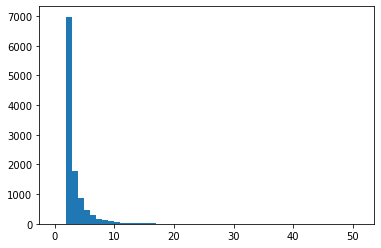

In [10]:
plt.hist(label_counts, bins=range(MAX_GROUP_SIZE+1))

In [11]:
train_df.sample(5)

,posting_id,image,image_phash,title,label_group
619,train_2928398792,04f2b96bb547db3e34e677a48dfb0013.jpg,ea196c36d34985b6,(DROPSHIP_COD) Plain black pekat long pants je...,3146605186
16188,train_2626445228,79dcac14896c86596688ee18a07b81cf.jpg,ebe1941e948c943f,WARDAH INTENSE MATTE LIPSTICK,2566305877
29752,train_3089680369,deb77157dbd53d1fdbdc9679e3d09412.jpg,b293ed6c921b24d6,Buku Tulis Kotak Besar,436217125
18221,train_3933825450,8960fa66e7281bcc6071a133445bdc0f.jpg,b0b765e841a370f5,Dari JAKARTA \xe2\x98\x85 Bisa COD \xe2\x98\x8...,1623865439
27384,train_2871799265,cce54c5accf5c71e745430350d543867.jpg,bc94c3cf929a9638,Tas Pria ZB RDN 069 Raindoz Bandung Ransel Pun...,1768089225


In [12]:
train_df.loc[train_df.label_group==220504063]

,posting_id,image,image_phash,title,label_group
9619,train_1159295868,481cc5591410b7eb0df6fc7719de0834.jpg,ced29db0424add1d,MONALISA SLIMMING SUIT WITH INFRARED SLIMMING ...,220504063
32231,train_3711756310,f1955ecdf8de4cdfd6ecee20d747febb.jpg,bb1be40ef1031d93,MONALISA ~ SLIMMING SUIT ~ BAJU PELANGSING den...,220504063


In [26]:
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

In [27]:
titles = train_df['title'].tolist()

In [28]:
tokenized_titles = roberta_tokenizer(titles, return_tensors="tf", padding=True, truncation=True)
lhs_titles = roberta_model(tokenized_titles, return_dict=True)

TypeError: 'RobertaTokenizer' object is not callable

In [ ]:
len(lhs_titles['last_hidden_state'])